# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "../../traffic-signs-data/train.p"
validation_file = "../../traffic-signs-data/valid.p"
testing_file = "../../traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [3]:
print(X_train.shape)

(34799, 32, 32, 3)


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [7]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_validation.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [8]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt

# Visualizations will be shown in the notebook.
%matplotlib inline


#### Plot class distribution in the training, validation, and test sets

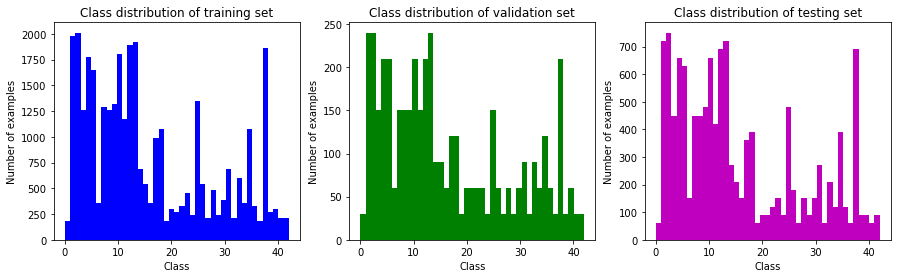

In [9]:
# Plot class distribution by class IDs
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
h_train = plt.hist(y_train, color='b', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(1,3,2)
h_validation = plt.hist(y_validation, color='g', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(1,3,3)
h_test = plt.hist(y_test, color='m', bins=n_classes)
plt.xlabel('Class'), plt.ylabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

Index(['ClassId', 'SignName'], dtype='object')


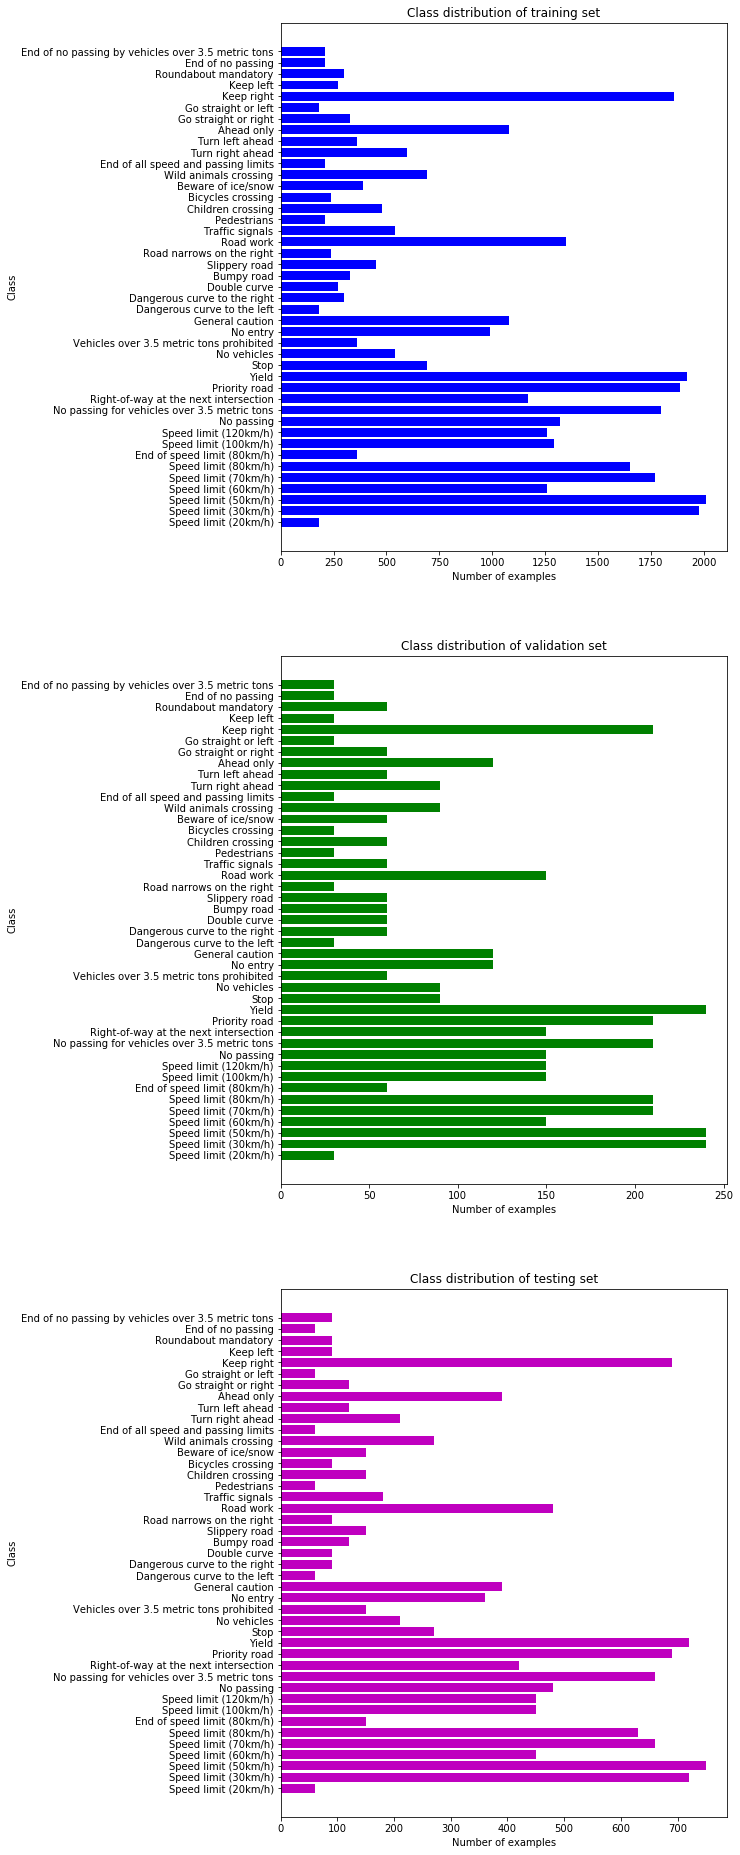

In [11]:
# Plot class distribution by sign names
signnames_file = "../../traffic-signs-data/signnames.csv"
signnames = pd.read_csv("signnames.csv")
print(signnames.columns)

# Display traffic sign names
plt.figure(figsize=(8,33))
plt.subplot(3,1,1)
plt.barh(signnames['ClassId'], h_train[0], color='b', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of training set')
plt.subplot(3,1,2)
plt.barh(signnames['ClassId'], h_validation[0], color='g', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of validation set')
plt.subplot(3,1,3)
plt.barh(signnames['ClassId'], h_test[0], color='m', tick_label=signnames['SignName'])
plt.ylabel('Class'), plt.xlabel('Number of examples'), plt.title('Class distribution of testing set')
plt.show()

**Comment:** The class distribution of the training, validation, and test sets look the same. The distributions are skewed. We can generate fake data for better training performance by using image augmentation techniques such as image translation, rotation, brightness, distortion, etc.

#### Plot traffic sign images

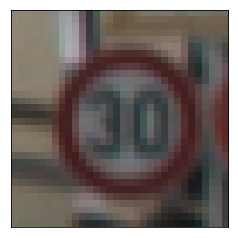

Original size: [38 38]
Class Id : 1
Sign name: Speed limit (30km/h)


In [12]:
# Plot a random resized image with its original size, class ID and sign name
sizes_train = train['sizes']
sizes_valid = valid['sizes']
sizes_test = test['sizes']
np.random.seed(0)
ind = np.random.randint(X_train.shape[0], size=1)[0]
plt.imshow(X_train[ind])
plt.xticks([]), plt.yticks([]), plt.show()
print("Original size: {}".format(sizes_train[ind]))
class_id = y_train[ind]
print("Class Id : {}".format(class_id))
print("Sign name: {}".format(signnames.SignName[class_id]))

[ 2732 21243 30403 32103 20757 14935 15430 14650 17089 32230 18983 24152
 16921 27469  6921  2163  5072  7877 18430  1871]


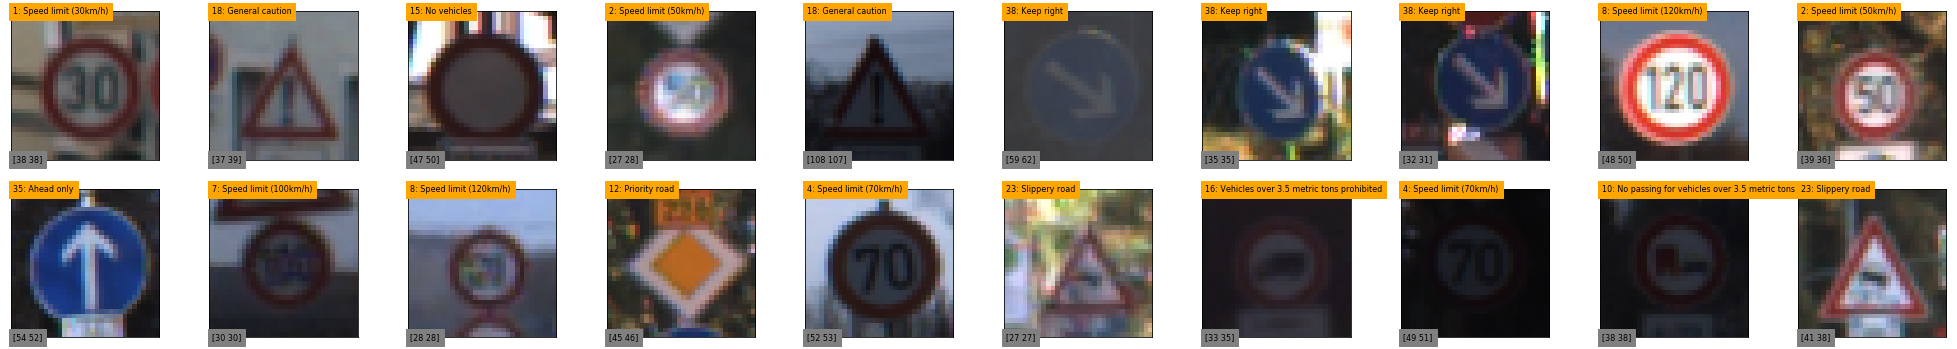

In [17]:
# Plot multiple images with original size, class ID and sign name
def plot_images(X, y, cols=5, sign_name=None, orignal_size=None, cmap=None, func=None):
    """
    Show images and their information
    """
    num_images = len(X)
    rows = np.ceil(num_images/cols)
    plt.figure(figsize=(cols*3.5,rows*3))
    for i in range(X.shape[0]):
        image = X[i]
        plt.subplot(rows, cols, i+1)
        if func is not None:
            image = func(image)
        plt.imshow(image, cmap=cmap)
        plt.xticks([]), plt.yticks([])#, plt.show()   
        if sign_name is not None:
            class_id = y[i]
            plt.text(0, 0, '{}: {}'.format(class_id, sign_name.SignName[class_id]), color='black',backgroundcolor='orange', fontsize=8)        
        if orignal_size is not None:
            plt.text(0, image.shape[0], '{}'.format(orignal_size[i]), color='black',backgroundcolor='gray', fontsize=8)    
    plt.show()
    
# Plot randomly 20 examples
np.random.seed(0)
indices = np.random.randint(X_train.shape[0], size=20)
print(indices)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
    

#### Plot traffic sign images of one class

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


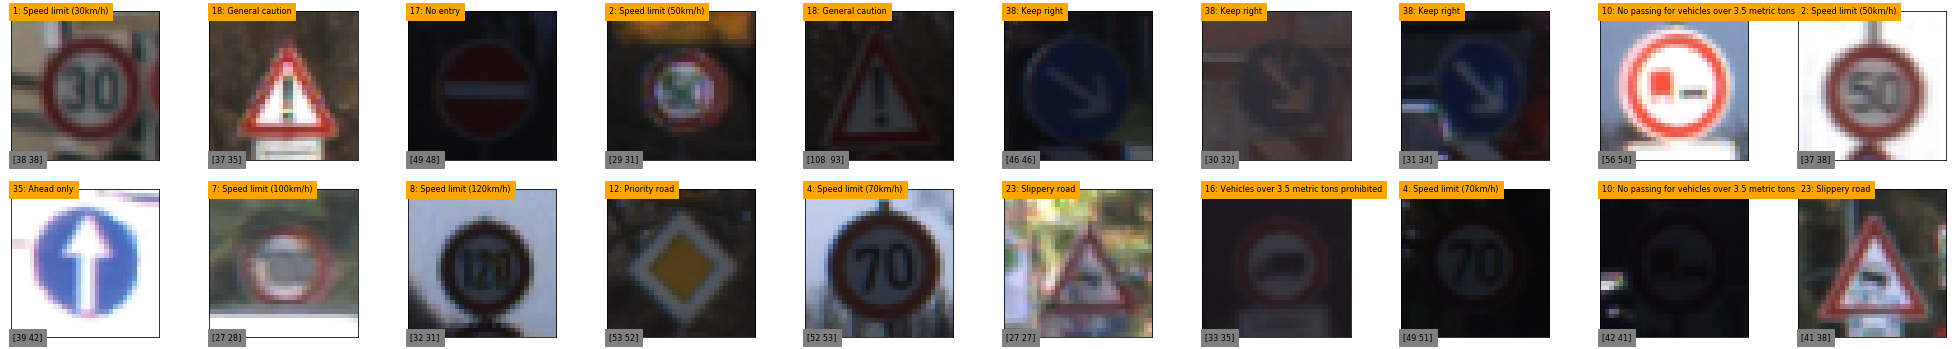

Class: [20]


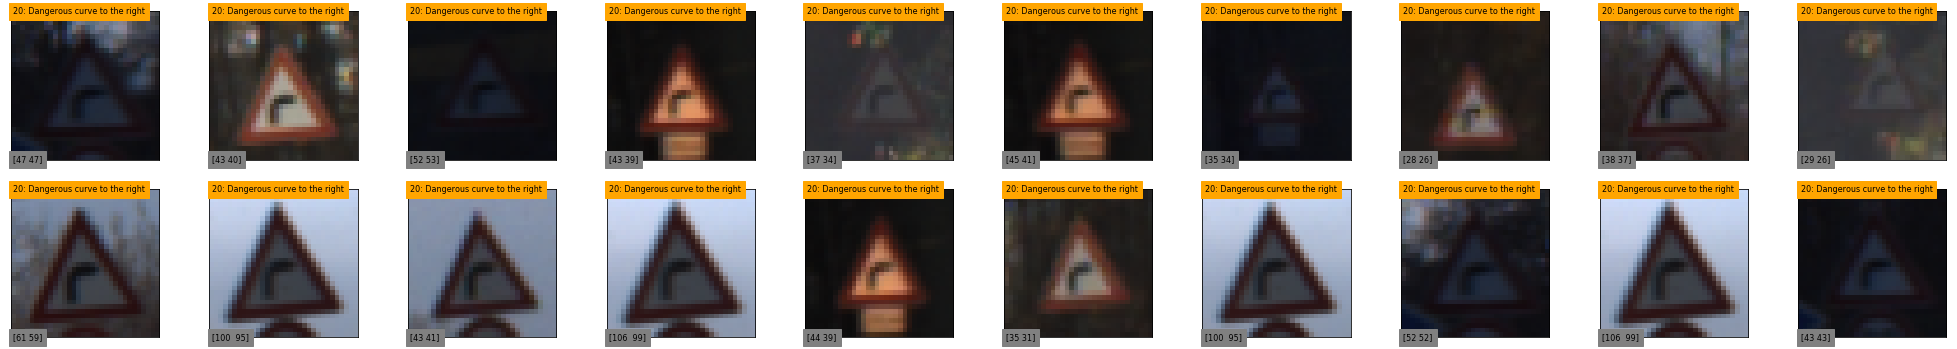

Class: [5]


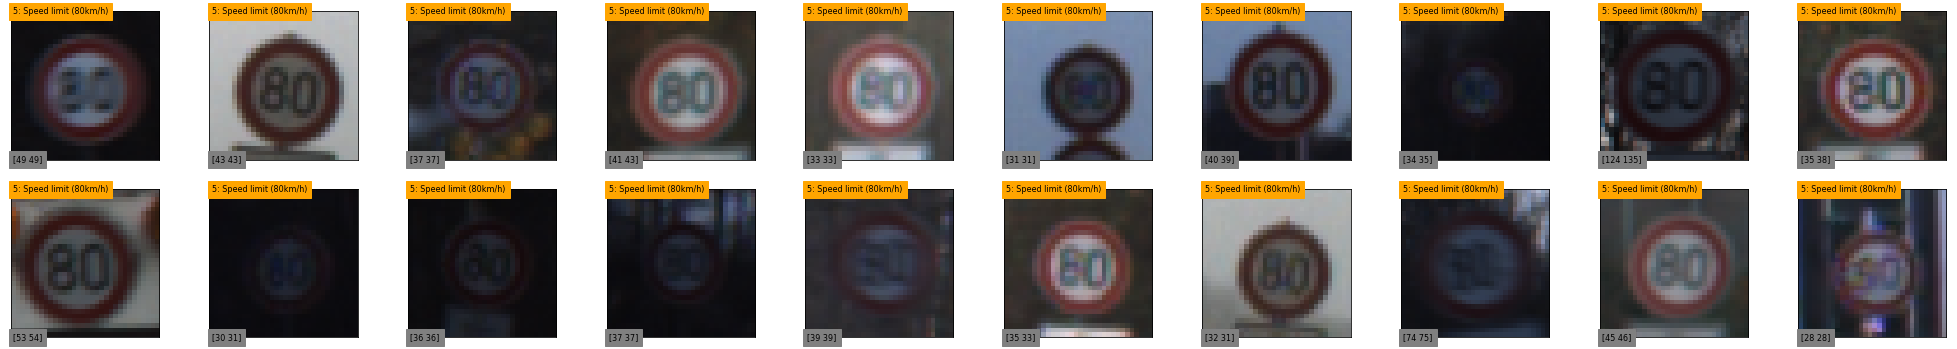

In [19]:
# Randomly select image's indices based on class_id
def select_images(X, y, class_id=None, num_images=20):
    """
    Randomly select image's indices based on class_id
    """
    if class_id is not None:
        indices = np.where(y==class_id)[0]
    else:
        indices = np.where(y)[0]
    
    np.random.seed(0)
    ind = np.random.randint(np.size(indices), size=num_images)
    # print(indices[ind])
    print("Class: {}".format(np.unique(y[indices[ind]])))
    return indices[ind]

indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices])

**Comment:** we can draw some conclusions about the image characteristics:
+ Images have different original size, making the signs are different in size --> This problem is already processed by scaling images to 32x32 in the downloaded dataset.
+ The brightness/darkness of the images are randomly different --> This problem can be improved by normalizing the images
+ Signs may be not straight and centered but slightly translated and rotated.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [20]:
import math
import cv2

# Resize images to 32x32 if using original images
def resize_image(img, shape=(32,32)):
    return cv2.resize(img, shape)

# Convert an image from rgb to grayscale
def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    # return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# Convert an image from rgb to hsv
def convert_hsv(img):
    """Convert image from rgb to hsv color space"""
    return cv2.cvtColor(x, cv2.COLOR_RGB2HSV)       
    
#Normalize the data for better brightness/darkness variation
#Implement Min-Max scaling for grayscale image data
def normalize(x, method=1):
    """
    For image data, (pixel - 128)/ 128 is a quick way to approximately normalize the data 
    and can be used in this project
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    # feature range [a, b]
    #x = grayscale(x)
    #x = x[:, :, np.newaxis]
    if method == 1:
        x_scaled = (x - 128)/128
    if method == 2:
        x_scaled = (x - x.mean())/x.std()
    return x_scaled   

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


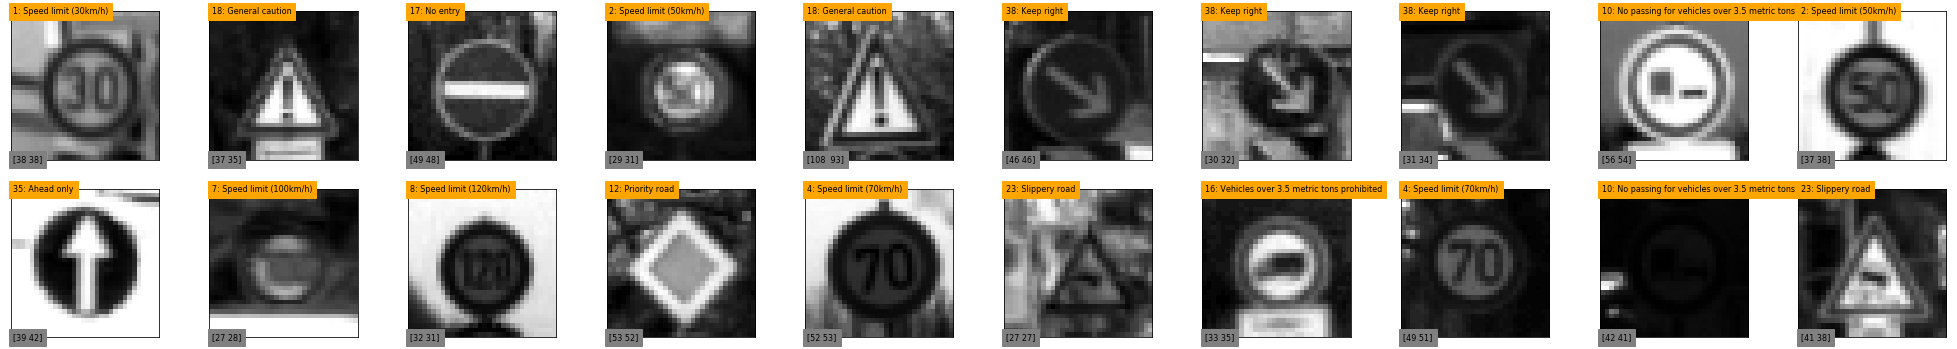

Class: [20]


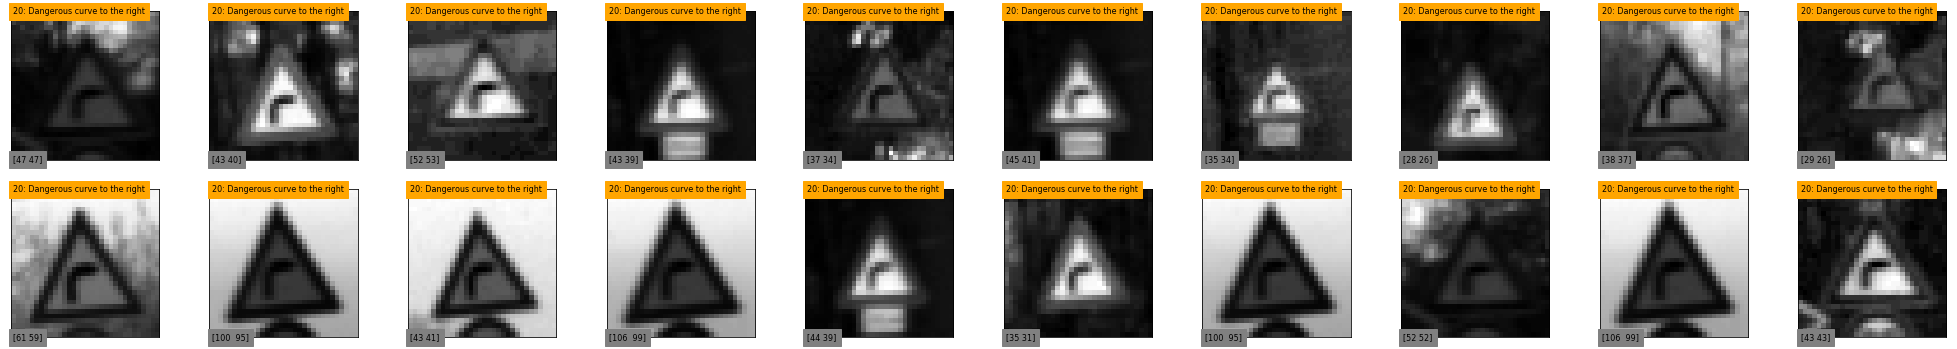

Class: [5]


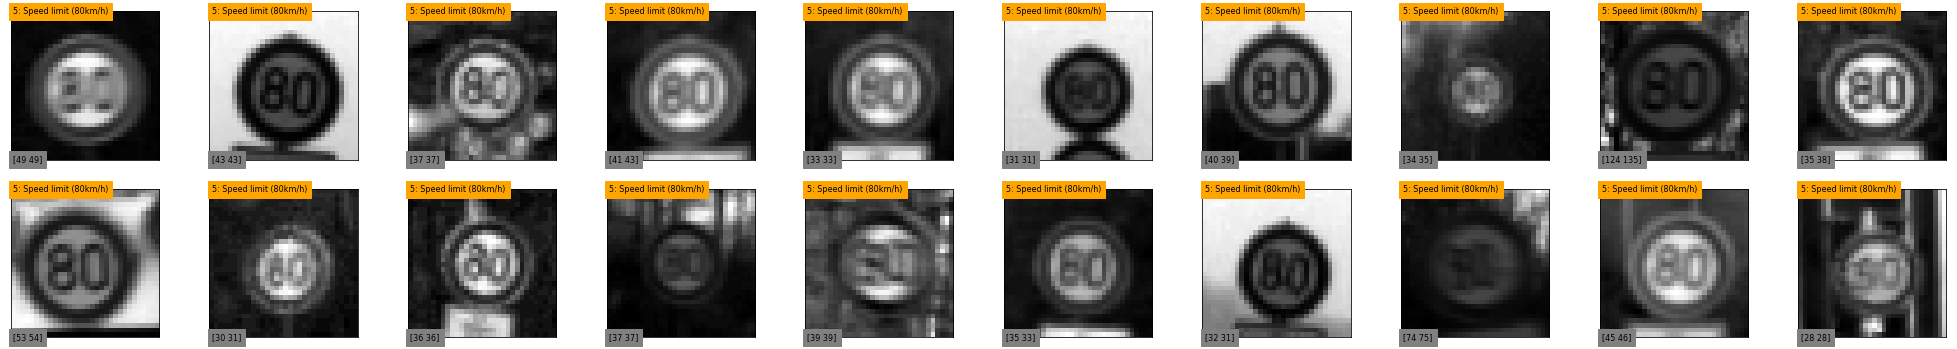

In [21]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=grayscale)

Class: [ 1  2  4  7  8 10 12 16 17 18 23 35 38]


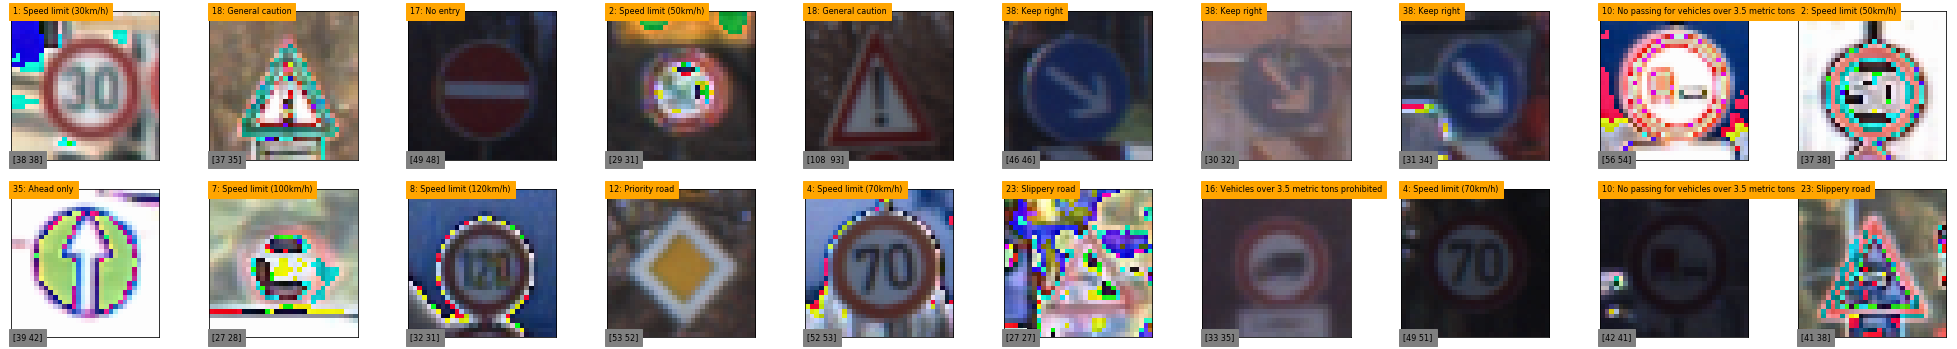

Class: [20]


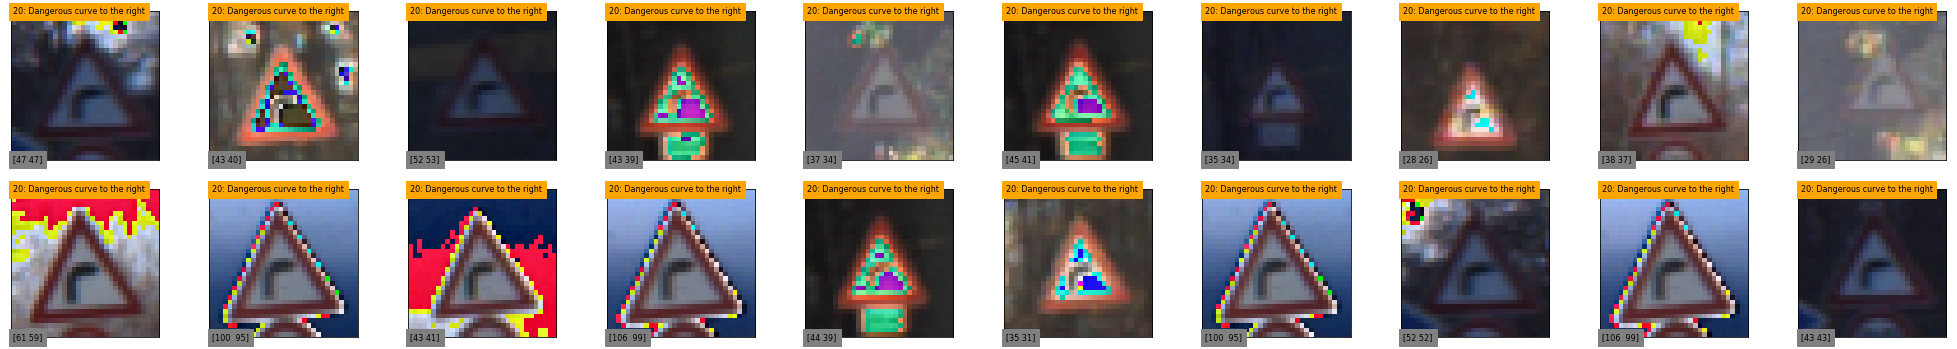

Class: [5]


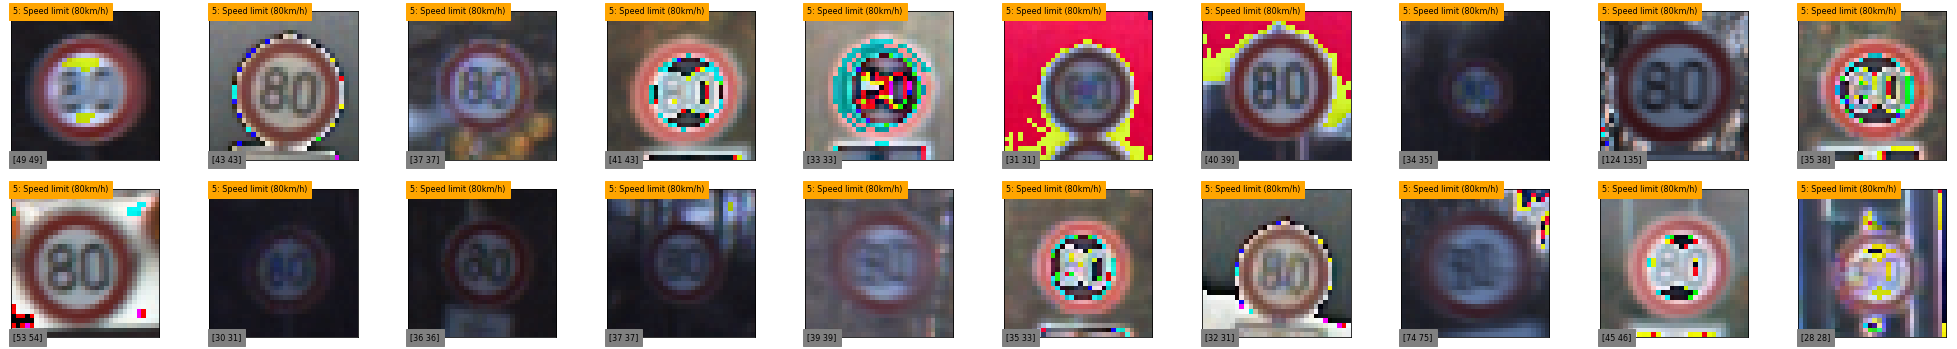

In [22]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=normalize)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=normalize)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], cmap='gray', func=normalize)

Since the class distributions are skewed, additional data is generated based on the current data with some modifications based on the image characteristics that the signs may be not straight and centered but slightly translated and rotated. Some image augmentation methods are considered such as translation, rotation, distortion, brightness adjustment, etc.

Generate fake data

In [ ]:
def rotate_image(img, angle):
    """
    Randomly rotate the image within the provided angle
    """
    if angle == 0:
        return img
    angle = np.random.uniform(-angle, angle)
    num_rows, num_cols = img.shape[:2]
    scale = 1.0
    rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), angle, 1)
    img_rotation = cv2.warpAffine(img, rotation_matrix, (num_cols, num_rows))
    return img_rotation


def translate_image(img, translation):
    """
    Randomly move the image horizontally and vertically within provided translation pixel
    """
    if translation == 0:
        return 0
    x = np.random.uniform(-translation, translation)
    y = np.random.uniform(-translation, translation)  
    num_rows, num_cols = img.shape[:2]
    translation_matrix = np.float32([ [1,0,x], [0,1,y] ])
    img_translation = cv2.warpAffine(img, translation_matrix, (num_cols, num_rows))
    return img_translation

def distort_image(img, shear):
    """
    Randomly distort the image horizontally and vertically within a provided amount
    """
    if shear == 0:
        return img
    num_rows, num_cols = img.shape[:2]
    left, right, top, bottom = shear, num_cols - shear, shear, num_rows - shear
    dx = np.random.uniform(-shear, shear)
    dy = np.random.uniform(-shear, shear)
    src_points = np.float32([[left   , top],[right   , top   ],[left, bottom]])
    dst_points = np.float32([[left+dx, top],[right+dx, top+dy],[left, bottom+dy]])
    affine_matrix = cv2.getAffineTransform(src_points,dst_points)
    img_distortion = cv2.warpAffine(img, affine_matrix, (num_cols, num_rows))
    return img_distortion

def adjust_brightness(img, ratio):
    """
    Randomly adjust brightness of the image.
    """
    # Change image to HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    # Get only v channel for brightness adjustment
    brightness = np.float64(hsv[:, :, 2])
    # Add random brightness adjustment
    brightness = brightness * (1.0 + np.random.uniform(-ratio, ratio))   
    brightness[brightness>255] = 255
    brightness[brightness<0] = 0
    hsv[:, :, 2] = brightness
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
def augment_image(img, angle=5.0, translation=3, shear=2, ratio=0.5):
    img = rotate_image(img, angle)
    img = translate_image(img, translation)
    img = distort_image(img, shear)
    img = adjust_brightness(img, ratio)
    return img

And below is the example of above traffic sign images after augmentation with default parameters.

In [ ]:
indices = select_images(X_train, y_train, class_id=None, num_images=20)
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=20, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)
indices = select_images(X_train, y_train, class_id=5, num_images=20 )
plot_images(X_train[indices], y_train[indices], cols=10, sign_name=signnames, orignal_size=sizes_train[indices], func=augment_image)

In [19]:
# Preprocess data
#X_train = np.array([normalize(x, method=2) for x in X_train])
#X_validation = np.array([normalize(x, method=2) for x in X_validation])

### Model Architecture

In [ ]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

The model is based on LeNet by Yann LeCun. It is a convolutional neural network designed to recognize visual patterns directly from pixel images with minimal preprocessing. It can handle hand-written characters very well.

Source: http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf

![LeNet Architecture](lenet.png)
Source: Yan LeCun

#### Implement our architecture
Our architecture is based on the LeNet-5 neural network architecture with some mofification.

**Input**

The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. If the images are grayscale, C is 1. If the images is RGB, C is 3.

**Architecture**

**Layer 1:**

*Convolutional.* The output shape should be 28x28x6.

*Activation.* ReLU.

*Pooling.* The output shape should be 14x14x6.

**Layer 2:**

*Convolutional.* The output shape should be 10x10x16.

*Activation.* ReLU.

*Pooling.* The output shape should be 5x5x16.

*Flatten.* Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten. This should have 400 outputs

**Layer 3:** 

*Fully Connected.* This should have 120 outputs.

*Activation.* ReLU.

**Layer 4:** 

*Fully Connected.* This should have 43 outputs.

*Activation.* Softmax.

**Output**

Return the result of the 2nd fully connected layer.

In [35]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# LeNet based CNN
def sign_cnn(x, conv1_shape, conv2_shape, fc1_shape, fc2_shape):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12, conv1_shape=(5, 5, 3, 12)
    conv1_W = tf.Variable(tf.truncated_normal(shape=conv1_shape, mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(conv1_shape[3]))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x32, conv2_shape=(5, 5, 12, 32)
    conv2_W = tf.Variable(tf.truncated_normal(shape=conv2_shape, mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(conv2_shape[3]))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x32. Output = 800.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 240, fc1_shape=(800, 240)
    fc1_W = tf.Variable(tf.truncated_normal(shape=fc1_shape, mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(fc1_shape[1]))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 43, fc2_shape=(120, 43)
    fc2_W = tf.Variable(tf.truncated_normal(shape=fc2_shape, mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(fc2_shape[1]))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    return signs




def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    #signs   = tf.nn.softmax(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #fc3_b  = tf.Variable(tf.zeros(43))
    #signs = tf.matmul(fc2, fc3_W) + fc3_b
    
    return signs

# Double filters in convolution layers and # of neurons in fc layer
def MyNet_2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x12.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 12), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(12))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Input = 14x14x12. Output = 10x10x32
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 12, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x32. Output = 800.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 800. Output = 240.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(800, 240), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(240))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 240. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(240, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    #signs   = tf.nn.softmax(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #fc3_b  = tf.Variable(tf.zeros(43))
    #signs = tf.matmul(fc2, fc3_W) + fc3_b
    
    return signs

# Double Double filters in convolution layers and # of neurons in fc layer
def MyNet_3(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x24.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 24), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(24))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x24. Output = 14x14x24.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Layer 2: Convolutional. Input = 14x14x24. Output = 10x10x64
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 24, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)

    # TODO: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # TODO: Flatten. Input = 5x5x32. Output = 1600.
    fc0 = tf.contrib.layers.flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 1600. Output = 480.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 480), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(480))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    fc1    = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 240. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(480, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    signs   = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    #signs   = tf.nn.softmax(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 10.
    #fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    #fc3_b  = tf.Variable(tf.zeros(43))
    #signs = tf.matmul(fc2, fc3_W) + fc3_b
    
    return signs





#### Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [21]:
EPOCHS = 10
BATCH_SIZE = 128

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Features and Labels
Train MyNet to classify sign data.
x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [36]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#### Training Pipeline
Create a training pipeline that uses the model to classify sign data.

In [37]:
rate = 0.001

signs = MyNet_3(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=signs)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [38]:
correct_prediction = tf.equal(tf.argmax(signs, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#### Train the Model
Run the training data through the training pipeline to train the model.
Before each epoch, shuffle the training set.
After each epoch, measure the loss and accuracy of the validation set.
Save the model after training.

In [39]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './mynet')
    print("Model saved")

Training...

EPOCH 1 ...
Train Accuracy = 0.978
Validation Accuracy = 0.862

EPOCH 2 ...
Train Accuracy = 0.992
Validation Accuracy = 0.886

EPOCH 3 ...
Train Accuracy = 0.997
Validation Accuracy = 0.907

EPOCH 4 ...
Train Accuracy = 0.993
Validation Accuracy = 0.885

EPOCH 5 ...
Train Accuracy = 0.994
Validation Accuracy = 0.901

EPOCH 6 ...
Train Accuracy = 0.996
Validation Accuracy = 0.900

EPOCH 7 ...
Train Accuracy = 0.994
Validation Accuracy = 0.903

EPOCH 8 ...
Train Accuracy = 0.996
Validation Accuracy = 0.922

EPOCH 9 ...
Train Accuracy = 0.993
Validation Accuracy = 0.909

EPOCH 10 ...
Train Accuracy = 0.997
Validation Accuracy = 0.920

Model saved


### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")